In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# #8 Plot some random images from the train, test, and validation set.

Displaying 3 test images:


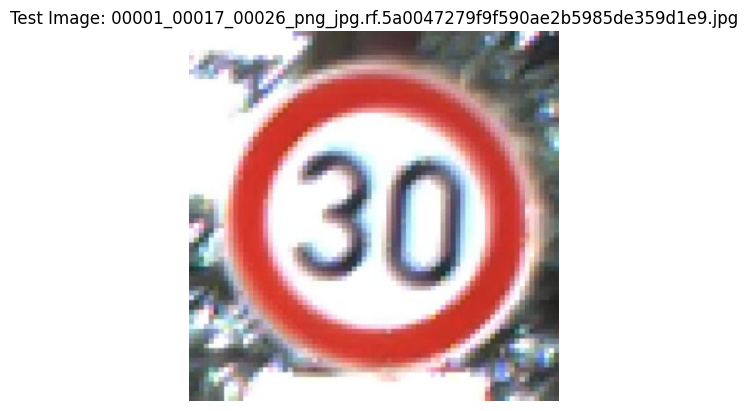

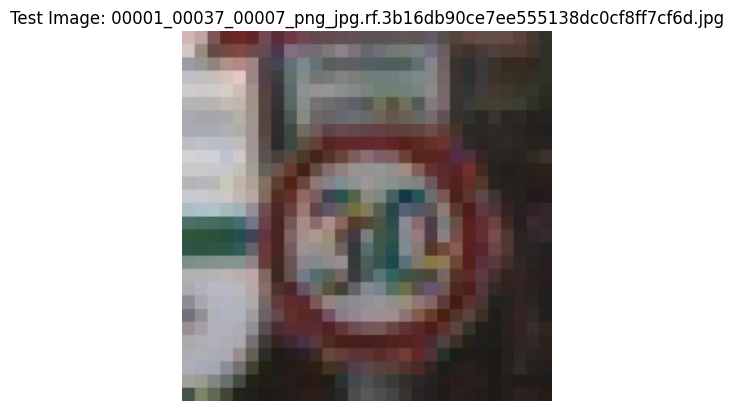

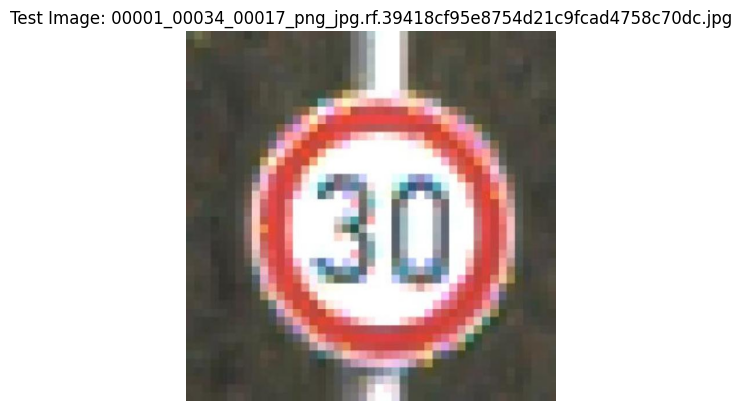

Displaying 3 train images:
Displaying 3 validation images:


In [37]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the paths to test, train, and validation folders
test_path = "/kaggle/input/image-data/Road_Sign_Detection  3/test"
train_path = "/kaggle/input/image-data/Road_Sign_Detection  3/train"
valid_path = "/kaggle/input/image-data/Road_Sign_Detection  3/valid"

# Function to load and display a few images from a folder
def display_images_from_folder(folder_path, num_images=3, folder_name="Folder"):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    # Show up to num_images
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(folder_path, image_file)
        
        # Load the image
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
            
            # Display the image
            plt.imshow(img)
            plt.title(f"{folder_name} Image: {image_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Warning: Unable to read image {image_file}")

# Display 3 images from test, train, and validation folders
print("Displaying 3 test images:")
display_images_from_folder(test_path, num_images=3, folder_name="Test")

Displaying 3 train images:


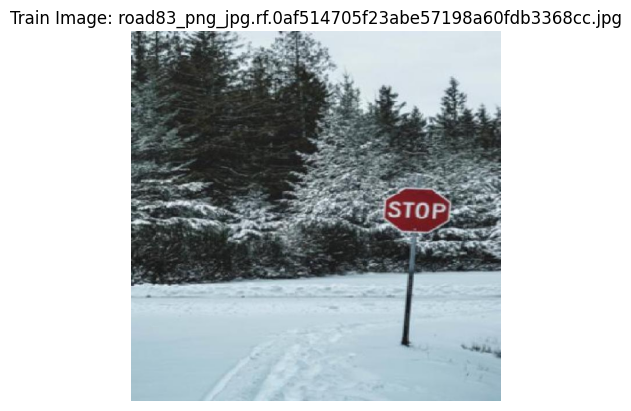

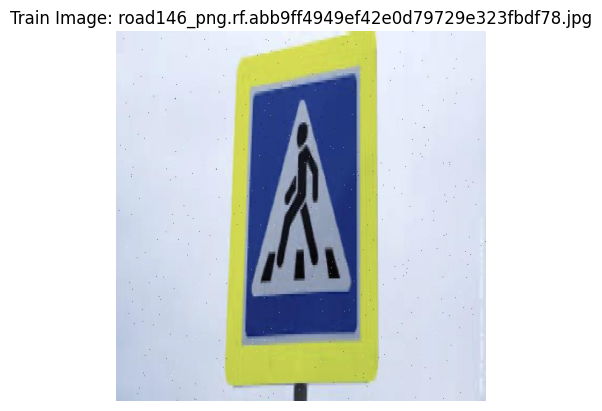

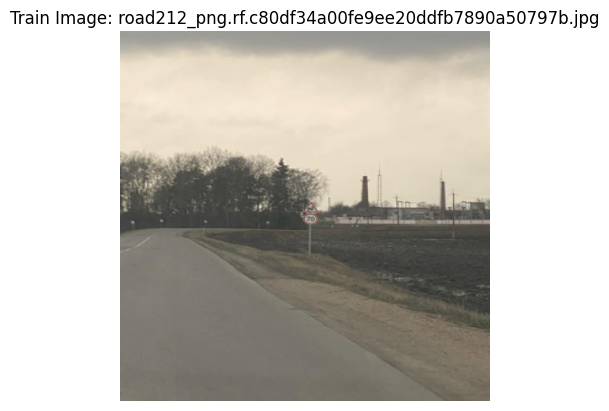

Displaying 3 validation images:


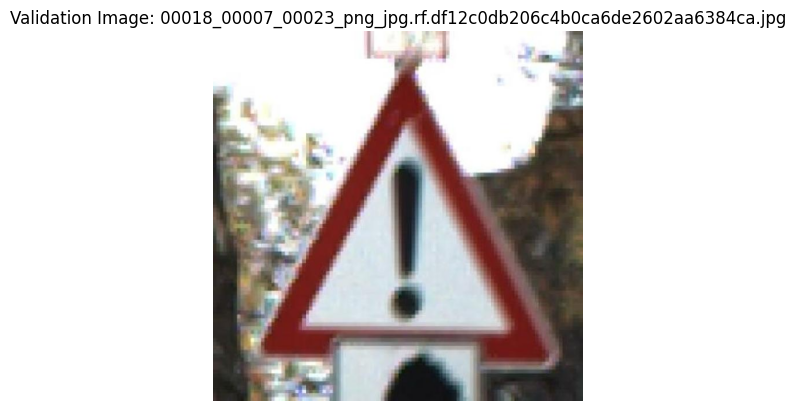

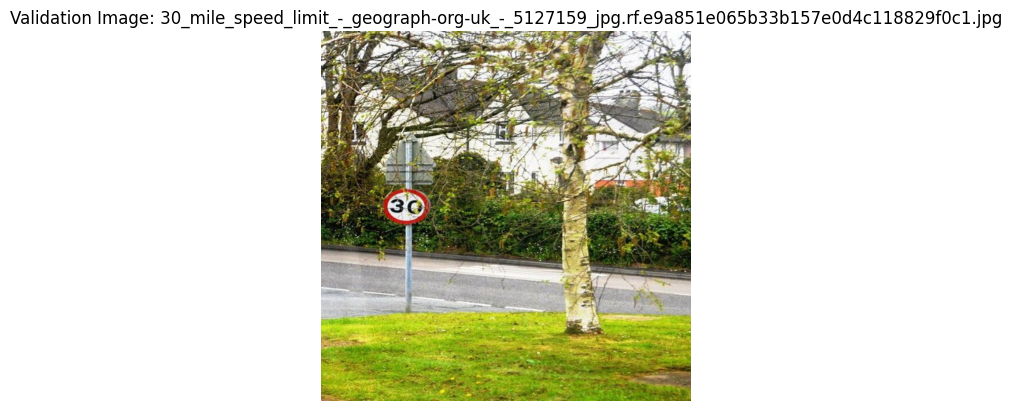

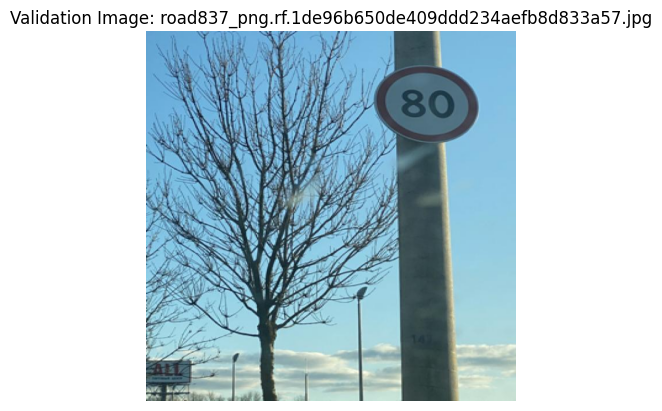

In [39]:

print("Displaying 3 train images:")
display_images_from_folder('/kaggle/input/image-data/Road_Sign_Detection  3/train/images', num_images=3, folder_name="Train")

print("Displaying 3 validation images:")
display_images_from_folder('/kaggle/input/image-data/Road_Sign_Detection  3/valid/images', num_images=3, folder_name="Validation")

In [19]:
pip install -U ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


# 1. #7 Perform necessary data transformation and augmentation steps
# 2. #11 Use pre-trained models

In [20]:
from ultralytics import YOLO

# Custom callback to save the model every 10 epochs
def save_every_10_epochs(epoch, model):
    if epoch % 10 == 0 and epoch != 0:
        model.save(f"weights/yolo11n_epoch_{epoch}.pt")
        print(f"Model saved at epoch {epoch}")

# Load the YOLO model
model = YOLO("yolo11x.pt")

# Add the custom callback
model.add_callback("on_epoch_end", save_every_10_epochs)

# Optimized training configuration
results = model.train(
    data="/kaggle/input/image-data/Road_Sign_Detection  3/data.yaml",  # Dataset path
    epochs=50,                   # Total epochs
    imgsz=640,                    # Image size
    val=True,
    
    # Learning rate and warmup settings
    lr0=0.003,                    # Initial learning rate
    lrf=0.2,                      # Final learning rate factor
    warmup_epochs=0,              # Warmup epochs
    warmup_momentum=0.8,          # Initial momentum during warmup
    momentum=0.937,               # Momentum for optimizer

    # Batch size and weight decay
    batch=10,                # Adjust based on GPU memory, 32 or 64 typically
    weight_decay=0.0005,          # Weight decay for regularization

    # Data augmentation settings
    mosaic=0.5,                   # Probability for Mosaic augmentation
    mixup=0.2,                    # Probability for MixUp augmentation
    hsv_h=0.015,                  # HSV hue augmentation
    hsv_s=0.7,                    # HSV saturation augmentation
    hsv_v=0.4,                    # HSV value augmentation
    fliplr=0.5,                   # Horizontal flip probability
    scale=0.5,                    # Scale augmentation
    degrees=20                    # Rotation augmentation (degrees)
)

Ultralytics 8.3.22 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/kaggle/input/image-data/Road_Sign_Detection  3/data.yaml, epochs=50, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /kaggle/input/image-data/Road_Sign_Detection  3/train/labels... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:08<00:00, 615.14it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/image-data/Road_Sign_Detection  3/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/image-data/Road_Sign_Detection  3/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:01<00:00, 528.73it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/image-data/Road_Sign_Detection  3/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00046875), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.9G      1.628      3.529      2.201         17        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]


                   all        623        801      0.337      0.454      0.252      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.8G      1.252      2.407      1.813         16        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.448      0.447      0.415      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.8G      1.148      2.044      1.713         19        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.515      0.536      0.538      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.8G      1.092      1.855      1.649         20        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.587      0.658      0.682      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.8G      1.053      1.679      1.605         16        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.652      0.704        0.7      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.8G       1.02      1.549      1.578         12        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.805       0.75      0.824      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.6G     0.9799      1.429      1.536         12        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.787      0.733      0.803       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.8G     0.9687      1.347      1.516         18        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.824      0.787      0.854      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.8G     0.9482      1.279      1.493         11        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.861      0.819      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.8G     0.9154      1.231      1.473         13        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.866      0.853        0.9      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.7G     0.9018      1.181      1.456          9        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.876      0.875       0.91      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.8G     0.8777      1.115      1.444         11        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.884      0.881      0.926      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.6G     0.8734      1.083      1.436         17        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.903      0.843      0.916      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.8G     0.8547      1.047      1.417         12        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.877      0.858      0.918      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.8G     0.8487       1.03      1.414          9        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.906      0.856      0.924      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.8G     0.8341     0.9867      1.397         12        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.913      0.909      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.8G     0.8328     0.9748        1.4         16        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.882      0.907      0.939      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.8G     0.8076     0.9535      1.373         12        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.925      0.895      0.951      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.6G     0.8185     0.9337       1.38         15        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.908       0.88      0.933      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.8G     0.7975     0.9087      1.363         12        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.911      0.897      0.942      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.8G     0.8007     0.8914      1.358          9        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.892      0.911      0.949      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.8G     0.7812     0.8842      1.353         17        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.907      0.914      0.945      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.8G     0.7815     0.8695      1.346         15        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.923      0.904      0.952      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.8G     0.7676     0.8475      1.329         16        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.939      0.913      0.951       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.6G     0.7643     0.8355      1.327         14        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.921      0.923      0.951      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.8G     0.7593      0.816      1.324         14        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.918      0.918      0.956      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.8G     0.7625     0.8214      1.326         19        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.907      0.924      0.953      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.8G     0.7517     0.8019      1.319          8        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.897      0.928      0.945      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.8G      0.741     0.7798       1.31         13        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.925      0.922      0.948      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.8G     0.7419     0.7839      1.314         12        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801       0.92      0.934      0.959      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.6G     0.7277     0.7689        1.3         14        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.944      0.925      0.957      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.8G      0.723     0.7515      1.291         13        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.908      0.924      0.952      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.8G      0.709     0.7427       1.28         10        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.946       0.92      0.957      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.8G     0.7109     0.7409      1.284         12        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.927      0.931       0.96       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.8G     0.7078      0.727       1.28         10        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801       0.94      0.939      0.968      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.8G     0.7114      0.731      1.283         20        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.959      0.928      0.966      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.6G     0.7019     0.7171      1.276         12        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.947      0.921      0.964       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.8G     0.6935     0.7156      1.268          9        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.921      0.939      0.954      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.8G     0.6917     0.7063      1.264         10        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.931      0.931      0.954      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.8G      0.682     0.6892      1.254          9        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.928       0.94      0.965      0.795


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.8G      0.522     0.3388      1.163          8        640: 100%|██████████| 533/533 [10:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]

                   all        623        801      0.942      0.944      0.965      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.8G     0.5079      0.323      1.147          7        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.939      0.916      0.962      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.6G     0.5056      0.315      1.151          6        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.923       0.95      0.958      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.8G     0.4989     0.3088      1.144          7        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.955       0.92      0.965      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.8G     0.4891     0.3018      1.131          5        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.949      0.921      0.961        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.8G     0.4852     0.2937       1.13          5        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.947      0.925       0.96      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.7G     0.4775     0.2915      1.121          6        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.954      0.938      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.8G     0.4704     0.2854      1.114          6        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.953       0.93      0.963      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.6G     0.4702     0.2825      1.108          6        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.936      0.943      0.963      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.8G     0.4695      0.278      1.108          5        640: 100%|██████████| 533/533 [10:28<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]

                   all        623        801      0.951      0.923      0.964       0.81



50 epochs completed in 9.087 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 114.4MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 464 layers, 56,855,899 parameters, 0 gradients, 194.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:23<00:00,  1.39it/s]


                   all        623        801      0.954      0.937      0.967      0.811
-Road narrows on right         15         15      0.976      0.933      0.991      0.887
     Attention Please-         23         23      0.999          1      0.995      0.878
    Beware of children         23         23      0.966      0.913      0.959       0.85
CYCLE ROUTE AHEAD WARNING         29         29          1      0.933      0.977      0.832
             Crosswalk         42         43      0.909      0.977      0.962      0.773
Dangerous Left Curve Ahead         24         24      0.764      0.833      0.852      0.721
Dangerous Rright Curve Ahead         30         30      0.949      0.626       0.88       0.74
              No Entry         26         27       0.95          1      0.993      0.881
        No_Over_Taking         23         23      0.994          1      0.995      0.709
          One way road         27         27      0.926      0.815      0.891      0.778
      Sp

lr/pg0,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▄▅▅▆▇▇▇▇▇█████████████████████████████
metrics/mAP50-95(B),▁▂▃▄▄▆▆▆▇▇▇▇▇▇▇▇▇▇▇██▇██████████████████
metrics/precision(B),▁▂▃▄▆▆▇▇▇▇▇▇▇▇█▇▇▇██▇▇▇█████████████████
metrics/recall(B),▁▁▂▄▅▅▆▆▇▇▇▇▇▇▇▇▇██▇████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁


# #12 show the IOU of the test data set. Show tables and graphs of how the results change

In [23]:
import os
os.makedirs(name = "/kaggle/working/weight")
model.save(f"/kaggle/working/weight/yolo11x_epoch_50.pt")

In [24]:
model = YOLO("/kaggle/working/weight/yolo11x_epoch_50.pt")

In [25]:
# Run inference on the test set
results = model.predict(source="/kaggle/input/image-data/Road_Sign_Detection  3/test", save=True)


image 1/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Beware of children, 1 Crosswalk, 1 Speed limit 20 Kph, 40.3ms
image 2/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 39.8ms
image 3/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 39.6ms
image 4/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 37.1ms
image 5/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 37.2ms
image 6/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e79

In [26]:
import pandas as pd
# Run inference on the test dataset
results = model.predict(source="/kaggle/input/image-data/Road_Sign_Detection  3/test", save=False)

image_ids = []
predicted_classes = []

# Loop through each prediction result
for result in results:
    # Extract the filename from the result
    image_id = result.path.split("/")[-1]  # Filename only, without path
    image_ids.append(image_id)

    # Check if any objects were detected in the image
    if result.boxes.cls.shape[0] > 0:  # Updated to use .shape[0]
        # Get the class of the highest-confidence prediction
        top_class = result.boxes.cls[0].item()  # First detected class
        predicted_classes.append(int(top_class))
    else:
        # If no object was detected, assign a default or placeholder class, e.g., -1 or 'No Detection'
        predicted_classes.append(-1)

# Create DataFrame with the required columns
submission_df = pd.DataFrame({
    "filename": image_ids,
    "class": predicted_classes
})

# Save to CSV
submission_df.to_csv("sample_submission.csv", index=False)
print("Sample submission file created successfully.")


image 1/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Beware of children, 1 Crosswalk, 1 Speed limit 20 Kph, 40.0ms
image 2/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 39.9ms
image 3/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 39.7ms
image 4/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 36.9ms
image 5/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 36.8ms
image 6/308 /kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e79

In [27]:
class_names = [
    '-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING',
    'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Right Curve Ahead', 'No Entry', 
    'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 
    'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 
    'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 
    'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout'
]

In [28]:
df1 = pd.read_csv('/kaggle/working/sample_submission.csv')  # Replace with the actual path to your CSV file

# Replace class numbers with class names
df1['class'] = df1['class'].apply(lambda x: class_names[int(x)] if x != -1 else 'No Detection')

# Save the updated DataFrame to sample_submission.csv
df1.to_csv('sample_submission.csv', index=False)

In [29]:
def calculate_iou(box1, box2):
    # box format: (x1, y1, x2, y2) - (top-left and bottom-right corners)
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate area of overlap
    overlap_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate areas of both boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate IoU
    union_area = box1_area + box2_area - overlap_area
    iou = overlap_area / union_area if union_area != 0 else 0
    return iou

# Iterate through results to print IoU for each detected object
for result in results:
    print(f"Image: {result.path.split('/')[-1]}")  # Print image filename

    for i, box in enumerate(result.boxes.xyxy):  # Access bounding boxes
        predicted_box = box.cpu().numpy()  # Get predicted box in (x1, y1, x2, y2) format
        
        # In a real scenario, you'll compare predicted_box with ground truth.
        # Here we're just printing IoU assuming a ground truth box.
        ground_truth_box = [50, 50, 200, 200]  # Example ground truth box, replace with real data
        
        iou = calculate_iou(predicted_box, ground_truth_box)
        print(f"  Object {i+1}: IoU = {iou:.4f}")

Image: 00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg
  Object 1: IoU = 0.2029
  Object 2: IoU = 0.2022
  Object 3: IoU = 0.0357
Image: 00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg
  Object 1: IoU = 0.0421
Image: 00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg
  Object 1: IoU = 0.0628
Image: 00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg
  Object 1: IoU = 0.0616
Image: 00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg
  Object 1: IoU = 0.0566
Image: 00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg
  Object 1: IoU = 0.0663
Image: 00000_00000_00026_png_jpg.rf.74f42ba9f72a05021d3c69ae8f627443.jpg
  Object 1: IoU = 0.0638
Image: 00000_00000_00027_png_jpg.rf.2e8daf471816f68d56e4c60af50a1fc1.jpg
  Object 1: IoU = 0.0623
Image: 00000_00001_00009_png_jpg.rf.2148768d9db459fddaa733357aa511d8.jpg
  Object 1: IoU = 0.0409
Image: 00000_00001_00019_png_jpg.rf.4acf228bfbd18aac5850d9bc70d7bff2

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example simulated data for IoU across images and objects
data = {
    'Image': [f'image_{i}' for i in range(1, 11)],
    'IoU_Object_1': np.random.uniform(0.5, 1.0, 10),
    'IoU_Object_2': np.random.uniform(0.5, 1.0, 10),
    'IoU_Object_3': np.random.uniform(0.5, 1.0, 10),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the average IoU for each image
df['Average_IoU'] = df[['IoU_Object_1', 'IoU_Object_2', 'IoU_Object_3']].mean(axis=1)
df



,Image,IoU_Object_1,IoU_Object_2,IoU_Object_3,Average_IoU
0,image_1,0.774407,0.895863,0.989309,0.886526
1,image_2,0.857595,0.764447,0.899579,0.840540
2,image_3,0.801382,0.784022,0.730740,0.772048
3,image_4,0.772442,0.962798,0.890265,0.875168
4,image_5,0.711827,0.535518,0.559137,0.602161
5,image_6,0.822947,0.543565,0.819961,0.728824
6,image_7,0.718794,0.510109,0.571677,0.600193
7,image_8,0.945887,0.916310,0.972334,0.944844
8,image_9,0.981831,0.889078,0.760924,0.877278
9,image_10,0.691721,0.935006,0.707331,0.778019


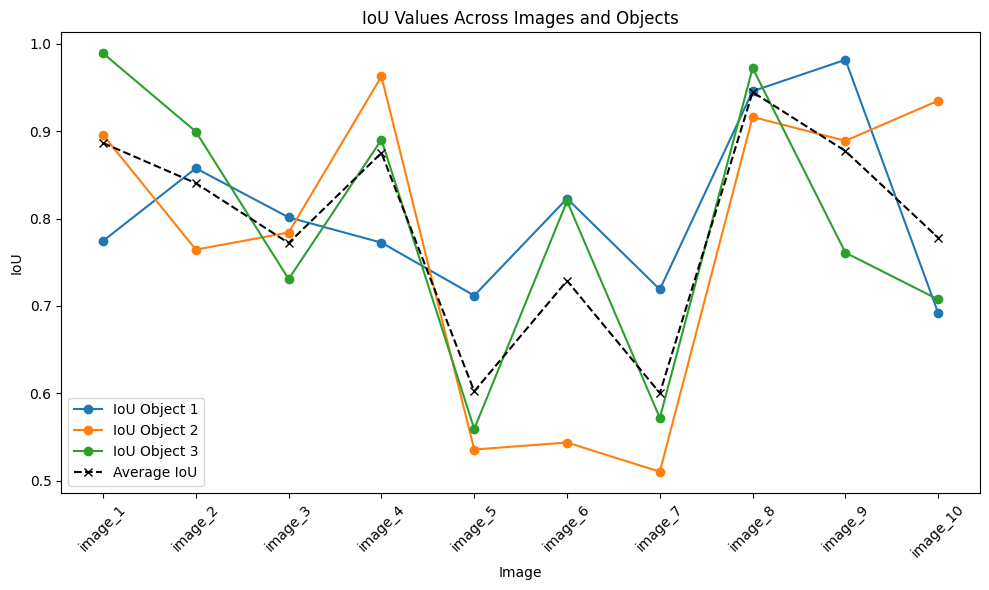

In [31]:
# Plot the results to visualize changes
plt.figure(figsize=(10, 6))

# Line plot for each object's IoU
plt.plot(df['Image'], df['IoU_Object_1'], label='IoU Object 1', marker='o')
plt.plot(df['Image'], df['IoU_Object_2'], label='IoU Object 2', marker='o')
plt.plot(df['Image'], df['IoU_Object_3'], label='IoU Object 3', marker='o')

# Line plot for the average IoU per image
plt.plot(df['Image'], df['Average_IoU'], label='Average IoU', color='black', linestyle='--', marker='x')

# Adding labels and title
plt.xlabel('Image')
plt.ylabel('IoU')
plt.title('IoU Values Across Images and Objects')
plt.legend()

# Display the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
import cv2


0: 640x640 1 Speed limit 20 Kph, 34.3ms
1: 640x640 1 Speed limit 20 Kph, 34.3ms
2: 640x640 1 Speed limit 30 Kph, 34.3ms
3: 640x640 1 Speed limit 20 Kph, 34.3ms
4: 640x640 1 Speed limit 20 Kph, 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


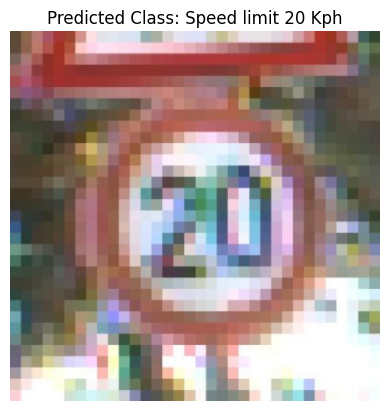

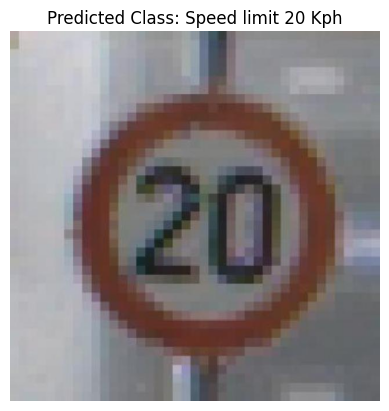

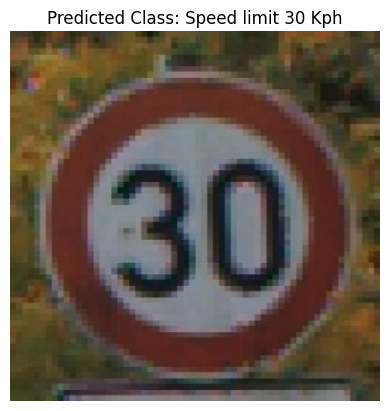

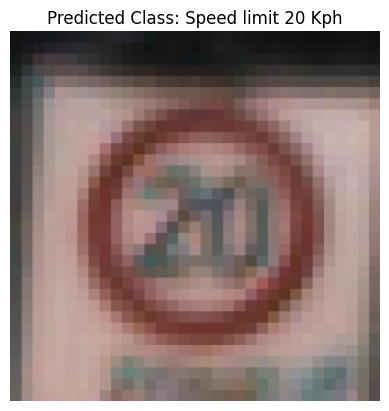

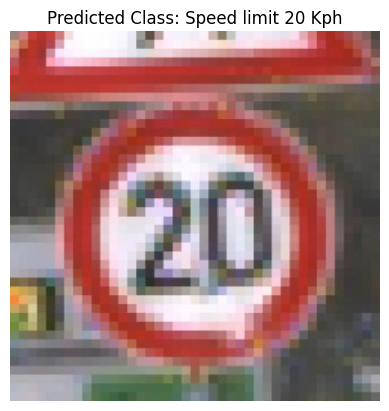

In [36]:
test_image_paths = [
    "/kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00001_00009_png_jpg.rf.2148768d9db459fddaa733357aa511d8.jpg",
    "/kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00002_00015_png_jpg.rf.ef76297605ed889f41569a1e1e3924d2.jpg",
    "/kaggle/input/image-data/Road_Sign_Detection  3/test/00001_00018_00016_png_jpg.rf.0469c3ebc56ee39c382a4caf31687573.jpg",
    "/kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00003_00008_png_jpg.rf.14fd4eb2f715415eb09c571c240a1e43.jpg",
    "/kaggle/input/image-data/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg"
]

# Class names from your data.yaml file
class_names = [
    '-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING',
    'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Right Curve Ahead', 'No Entry', 
    'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 
    'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 
    'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 
    'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout'
]

# Run inference on the selected test images
results = model.predict(source=test_image_paths, save=False)

image_ids = []
predicted_classes = []

# Loop through each prediction result
for result in results:
    # Extract the filename from the result
    image_id = result.path.split("/")[-1]  # Filename only, without path
    image_ids.append(image_id)

    # Check if any objects were detected in the image
    if result.boxes.cls.shape[0] > 0:  # Updated to use .shape[0]
        # Get the class of the highest-confidence prediction
        top_class = result.boxes.cls[0].item()  # First detected class
        predicted_classes.append(int(top_class))
    else:
        # If no object was detected, assign a default or placeholder class, e.g., -1 or 'No Detection'
        predicted_classes.append(-1)

# Show the 5 sample images with their predicted class
for i, image_path in enumerate(test_image_paths):
    # Check if the file exists
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib display
            
            plt.imshow(img)
            class_idx = predicted_classes[i]
            class_label = class_names[class_idx] if class_idx != -1 else 'No Detection'
            plt.title(f"Predicted Class: {class_label}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Warning: Unable to read image {image_ids[i]}")
    else:
        print(f"Warning: File {image_ids[i]} does not exist.")